#### 1. Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data

In [3]:
df = pd.read_csv('venues_2.csv')
df.head()

,Unnamed: 0,name,location.lat,location.lng,sub-district,sd-lat,sd-lng,category
0,0,Bengkel Ko Aji,-6.145625,106.790205,ANGKE,-6.145663,106.795697,Movie Theater
1,1,TV Room,-6.145872,106.796391,ANGKE,-6.145663,106.795697,Movie Theater
2,2,Season City XX1,-6.149000,106.794503,ANGKE,-6.145663,106.795697,Movie Theater
3,3,My Cinema,-6.145094,106.798164,ANGKE,-6.145663,106.795697,Movie Theater
4,4,XXI Junction,-6.140917,106.794491,ANGKE,-6.145663,106.795697,Movie Theater


#### 3. Get unique category to make columns

In [33]:
categories = df['category'].unique()
sub_district = df['sub-district'].unique()

In [34]:
df_categories = pd.DataFrame(columns=categories)
df_categories.insert(0,'sub-district',sub_district)
df_categories.head()

,sub-district,Movie Theater,College Academic Building,Asian Restaurant,Indonesian Restaurant,Bar,Athletics & Sports,School,Spiritual Center,Bank,Market,Bus Station,Train Station,Hospital,Pharmacy,ATM,Garden,Animal Shelter
0,ANGKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PASEBAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KRENDANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TAMBORA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DUREN SAWIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_categories.set_index('sub-district',inplace=True)

#### 4. Creating datafilter to count every categories

In [88]:
# df_filter = df[['sub-district','category']]
# a = df_filter[(df_filter['sub-district'] == 'ANGKE') & (df_filter['category'] == 'Movie Theater')]
# index = a.index
# result = len(index)
# print(result)

5


In [127]:
df_filter = df[['sub-district','category']]
for indexa in df_categories.index:
    for row in df_categories.columns:
        temp = df_filter[(df_filter['sub-district'] == indexa) & (df_filter['category'] == row)]
        index = temp.index
        result = len(index)
        df_categories.loc[indexa][row] = result
df_categories.head()

,Movie Theater,College Academic Building,Asian Restaurant,Indonesian Restaurant,Bar,Athletics & Sports,School,Spiritual Center,Bank,Market,Bus Station,Train Station,Hospital,Pharmacy,ATM,Garden,Animal Shelter
sub-district,,,,,,,,,,,,,,,,,
ANGKE,5,8,48,46,6,16,34,47,17,6,6,3,5,8,0,0,0
PASEBAN,2,14,46,45,5,18,10,46,22,5,10,13,30,5,1,1,0
KRENDANG,5,5,50,49,2,27,49,29,37,8,0,0,11,7,0,4,1
TAMBORA,2,14,46,45,5,18,10,46,22,5,10,13,30,5,1,1,0
DUREN SAWIT,2,14,46,45,5,18,10,46,22,5,10,13,30,5,1,1,0


In [131]:
df_categories.describe()

,Movie Theater,College Academic Building,Asian Restaurant,Indonesian Restaurant,Bar,Athletics & Sports,School,Spiritual Center,Bank,Market,Bus Station,Train Station,Hospital,Pharmacy,ATM,Garden,Animal Shelter
count,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262
unique,17,32,23,36,18,33,38,39,37,10,25,8,32,21,4,10,4
top,2,14,46,45,5,18,10,46,22,5,10,13,30,5,1,1,0
freq,183,174,180,179,178,175,176,174,174,179,179,173,176,182,188,191,224


In [156]:
def makePie(labels,sizes):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

<class 'list'>
17


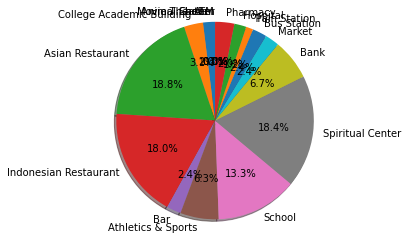

In [157]:
label = df_categories.columns.tolist()
values = df_categories.loc['ANGKE'].tolist()
print(type(label))
print(len(values))
makePie(label,values)